In [1]:

import pandas as pd
import numpy as np
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from sklearn.linear_model import LogisticRegression
from matplotlib import style

UsageError: Line magic function `%` not found.


In [2]:
train_data = pd.read_csv(r'Titanic_Data_train.csv')

In [3]:
test_data = pd.read_csv(r'Titanic_Data_test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
total = train_data.isnull().sum().sort_values(ascending=False)

In [9]:
percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)

In [10]:
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
percent

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [12]:
missing_tab = pd.concat((total,percent), axis=1, keys=['Total_Miss','%'])

In [13]:
missing_tab

,Total_Miss,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


<ipython-input-14-4cb0b30a049b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=30, label=surv, ax=axes[0], kde=False)
<ipython-input-14-4cb0b30a049b>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==0].Age.dropn

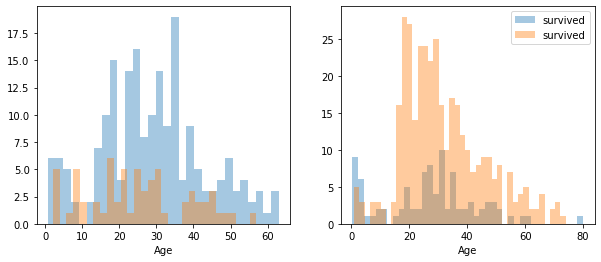

In [14]:
surv = 'survived'
not_srv = 'not_survived'

fig,axes = plt.subplots(nrows=1,ncols= 2, figsize=(10,4))

men  = train_data[train_data['Sex']=='male']
women  = train_data[train_data['Sex']=='female']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=30, label=surv, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=30, label=surv, ax=axes[0], kde=False)

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=40, label=surv, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=surv, ax=axes[1], kde=False)

ax.legend()

In [15]:
men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.

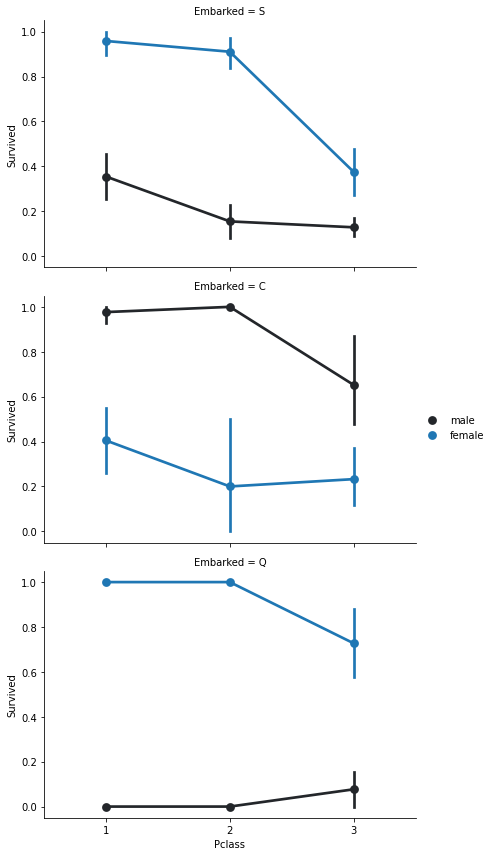

In [16]:
g  = sns.FacetGrid(train_data, row='Embarked',height=4,aspect=1.5)

g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

<Axes: xlabel='Pclass', ylabel='Survived'>

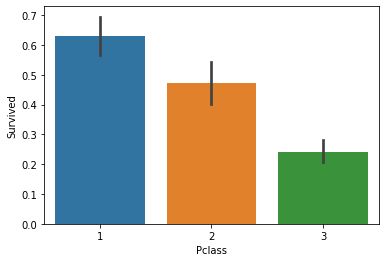

In [17]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a fut

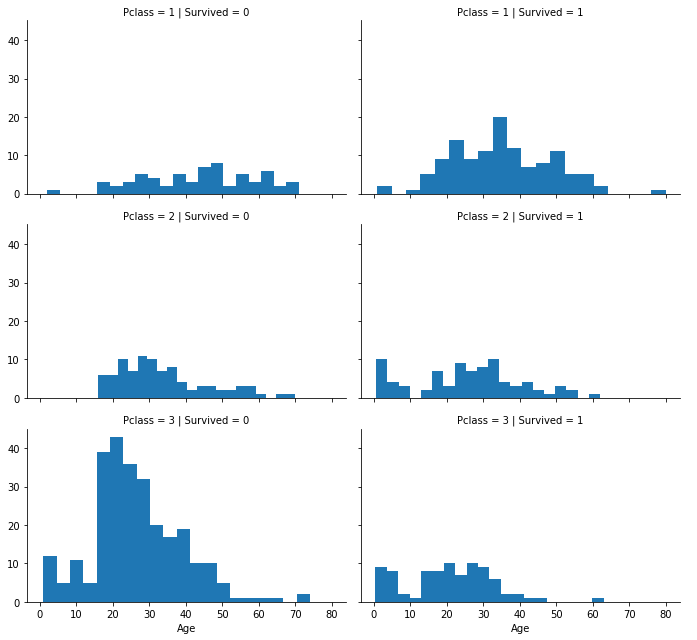

In [18]:
grid = sns.FacetGrid(train_data, row='Pclass',col='Survived',height=3,aspect=1.6)

grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

In [19]:
data = [train_data, test_data]

In [20]:
data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [25]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [29]:
axes = sns.catplot('relatives','Survived',data=train_data, aspect = 2.5 )

TypeError: catplot() got multiple values for argument 'data'

In [31]:
train_data = train_data.drop(['PassengerId','Name','Ticket'], axis=1)

In [32]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [33]:
data = [train_data, test_data]
for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [40]:
test_data['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [34]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_data, test_data]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x)
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

SyntaxError: invalid syntax (<ipython-input-34-ee35c065786e>, line 7)